In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
FIGSSIZE = (12, 6)


In [2]:
data = pd.read_csv('data/Control tension Oct 2019.csv', index_col="Dia")
data.index = pd.to_datetime(data.index, format="%d/%m/%y %H:%M")
#data.head()
night_takes_index = data.index.hour > 17
morning_takes_index = data.index.hour < 12 

nigth_takes = data[night_takes_index]
morning_takes = data[morning_takes_index]

data['Momento del día'] = ''
data.loc[night_takes_index,'Momento del día'] = 'Noche'
data.loc[morning_takes_index,'Momento del día'] = 'Mañana'

In [3]:
def show_analysis(takes, title):
    print(" -- {0} ({1} tomas) --".format(title, takes.shape[0]))
    #print("")
    #print("Promedios:")
    #print("  Sistólica: {0:.1f}".format(takes['Sistolica'].mean() ))
    #print("  Diastólica: {0:.1f}".format(takes['Diastolica'].mean() ))
    print("")
    print("Medias:")
    print("  Sistólica: {0:.1f}".format(takes['Sistolica'].median() ))
    print("  Diastólica: {0:.1f}".format(takes['Diastolica'].median() ))
    print("")
    print("Máximos:")
    print("  Sistólica: {0}".format(takes['Sistolica'].max() ))
    print("  Diastólica: {0}".format(takes['Diastolica'].max() ))
    print("")
    print("Mìnimos:")
    print("  Sistólica: {0}".format(takes['Sistolica'].min() ))
    print("  Diastólica: {0}".format(takes['Diastolica'].min() ))
    print("")
    takes.plot(title=title, figsize=FIGSSIZE)
    

 -- Total de muestra (53 tomas) --

Medias:
  Sistólica: 122.0
  Diastólica: 80.0

Máximos:
  Sistólica: 153
  Diastólica: 98

Mìnimos:
  Sistólica: 96
  Diastólica: 64



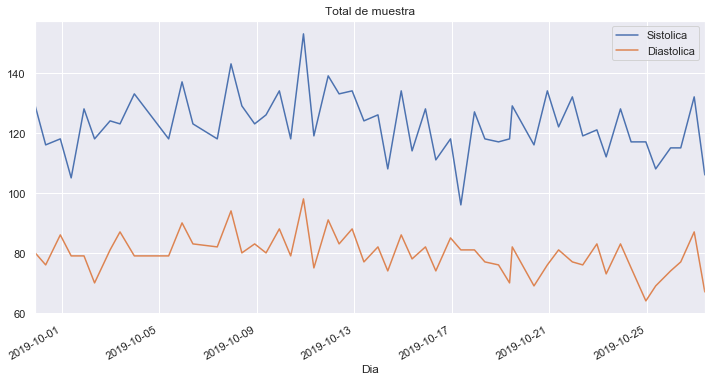

In [4]:
show_analysis(data, "Total de muestra")

 -- Tomas de la mañana (28 tomas) --

Medias:
  Sistólica: 118.0
  Diastólica: 77.0

Máximos:
  Sistólica: 133
  Diastólica: 87

Mìnimos:
  Sistólica: 96
  Diastólica: 67



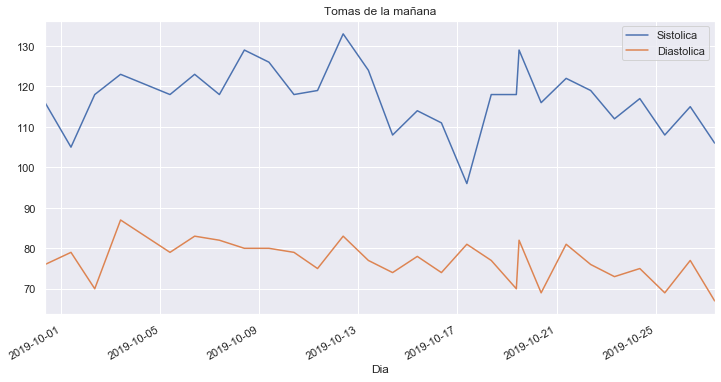

In [5]:
show_analysis(morning_takes, "Tomas de la mañana")

 -- Tomas de la noche (25 tomas) --

Medias:
  Sistólica: 128.0
  Diastólica: 83.0

Máximos:
  Sistólica: 153
  Diastólica: 98

Mìnimos:
  Sistólica: 115
  Diastólica: 64



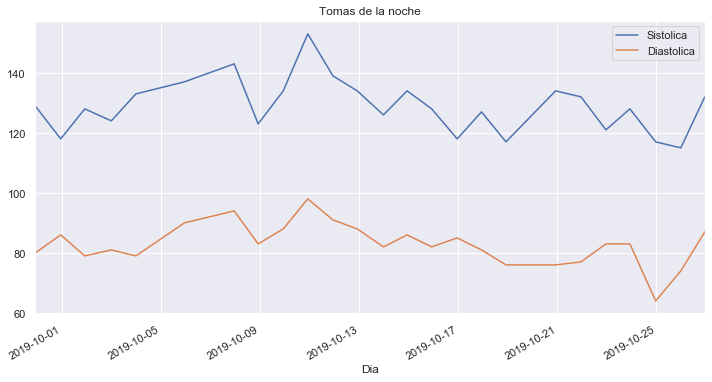

In [6]:
show_analysis(nigth_takes, "Tomas de la noche")

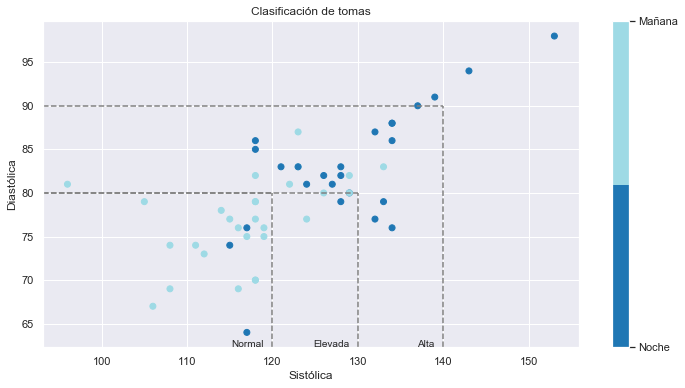

In [35]:
fig = plt.figure(figsize=FIGSSIZE)
ax = plt.axes()
plt.scatter(data['Sistolica'], data['Diastolica'], 
            c=data['Momento del día'] == 'Mañana', cmap=plt.cm.get_cmap('tab20', 2))
cbar = plt.colorbar(ticks=[0, 1])
cbar.ax.set_yticklabels(['Noche', 'Mañana'])

ax.set_title("Clasificación de tomas")
ax.set_xlabel("Sistólica")
ax.set_ylabel("Diastólica")

markers = [(120, 80, "Normal" ), (130, 80, "Elevada"), (140, 90, "Alta")]

for marker in markers:
    ax.axvline(marker[0],ymin=0, ymax=(marker[1] - ax.get_ylim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0]), 
               linestyle='--', color="gray")
    ax.text(marker[0] - 1,ax.get_ylim()[0] , marker[2], horizontalalignment='right')
    
for marker in markers:
    ax.axhline(marker[1],xmin=0, xmax=(marker[0] - ax.get_xlim()[0]) / (ax.get_xlim()[1] - ax.get_xlim()[0]), 
               linestyle='--', color="gray")

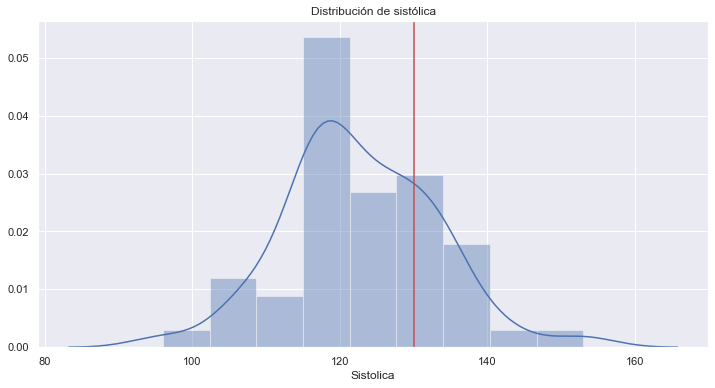

In [8]:
fig = plt.figure(figsize=FIGSSIZE)
ax = sns.distplot(data['Sistolica'])
ax.set_title("Distribución de sistólica")
ax.axvline(130, color='r')

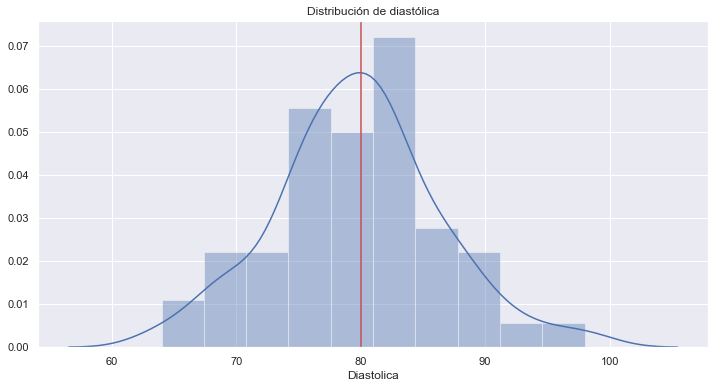

In [9]:
fig = plt.figure(figsize=FIGSSIZE)
ax = sns.distplot(data['Diastolica'])
ax.set_title("Distribución de diastólica")
ax.axvline(80, color='r')

Text(0.5, 1.0, 'Comparación de distribución de sistólicas por momento del día')

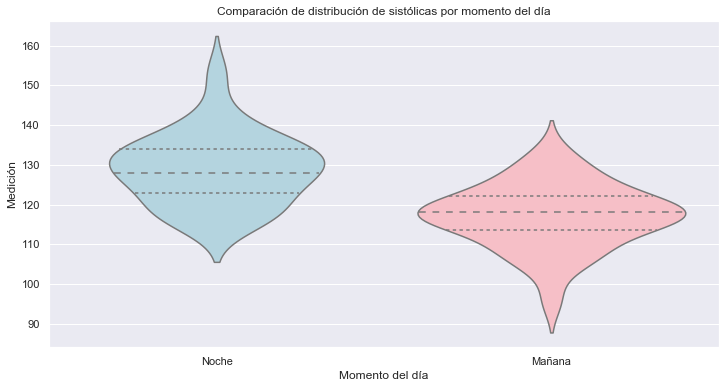

In [10]:


diastolics = data.drop('Sistolica', axis=1)
diastolics['take_type'] = 'Diastolica'
diastolics.rename(columns={'Diastolica': 'Medición'}, inplace=True)

sistolics = data.drop('Diastolica', axis=1)
sistolics['take_type'] = 'Sistolica'
sistolics.rename(columns={'Sistolica': 'Medición'}, inplace=True)

data_t = pd.concat([sistolics, diastolics], sort=True)

fig = plt.figure(figsize=FIGSSIZE)
ax = sns.violinplot('Momento del día', 'Medición', data=sistolics,
              inner='quartile', palette=['lightblue', 'lightpink'])

ax.set_title("Comparación de distribución de sistólicas por momento del día")

Text(0.5, 1.0, 'Comparación de distribución de diastólicas por momento del día')

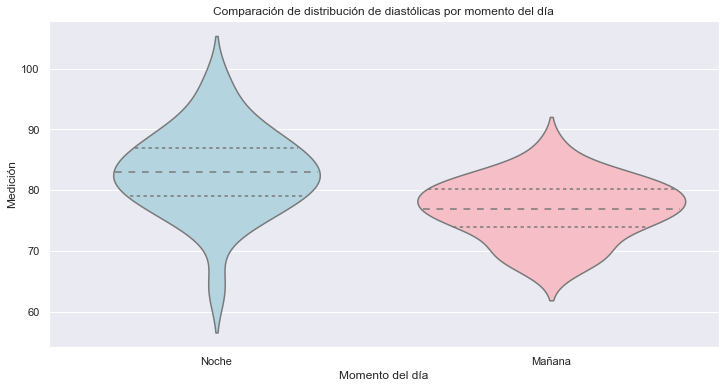

In [11]:
fig = plt.figure(figsize=FIGSSIZE)
ax = sns.violinplot('Momento del día', 'Medición', data=diastolics,
              inner='quartile', palette=['lightblue', 'lightpink'])

ax.set_title("Comparación de distribución de diastólicas por momento del día")